In [1]:
from train import train
from visualize import plot_model, plot_models, plot_hists, plot_hist, plot_mcmc
from distributions import Normal, Distribution, Gamma
import torch
from torch.distributions import Categorical
from torch.nn import Module, ModuleList
import numpy as np
import torch.distributions as dist
import matplotlib.pyplot as plt
from mixture_model import MixtureModel
from mcmc import metropolis_hastings

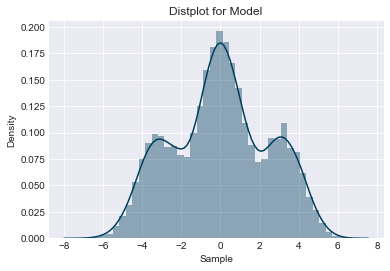

S tensor([[-0.7345]], grad_fn=<IndexBackward>)
tensor([-1.8507], grad_fn=<LogsumexpBackward>)


In [2]:
true = MixtureModel([Normal([3.2], [[1.0]]), 
                    Normal([0.0], [[1.0]]),
                    Normal([-3.2], [[1.0]])],
                    [0.25, 0.5, 0.25])

# true = Normal([2.3], [[2.0]])

plot_model(true)
sample = true.sample(1)
print("S", sample)
print(true.log_prob(sample))

In [3]:
samples = metropolis_hastings(true, keep=500)

In [4]:
true_samples = true.sample(len(samples)).detach().numpy()

In [5]:
print(samples.mean(), samples.var())
print(len(samples))

print(true_samples.mean(), true_samples.var())
print(len(true_samples))

tensor(0.0174) tensor(5.9441)
7433
0.013571596 5.9971714
7433


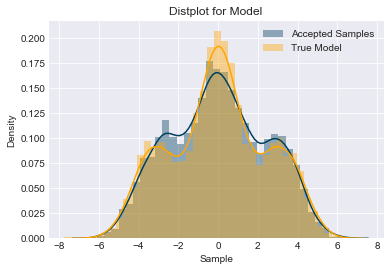

In [6]:
plot_hists(samples, true_samples)

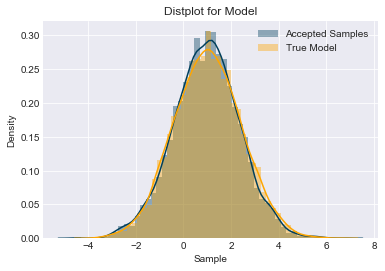

torch.Size([7078, 1, 1])

In [80]:
m = Normal([1.0], [[2.0]])

mcmc_samples = metropolis_hastings(m)
samples = m.sample(len(mcmc_samples)).detach().numpy()

plot_hists(mcmc_samples, samples)
mcmc_samples.shape

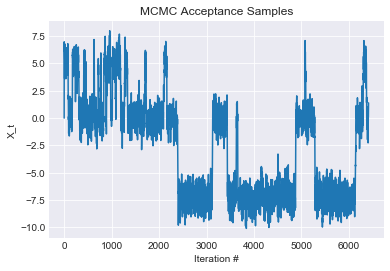

In [79]:
true = MixtureModel([Normal([5.2], [[1.0]]), 
                    Normal([0.0], [[1.0]]),
                    Normal([-7.2], [[1.0]])],
                    [0.25, 0.5, 0.25])

samples = metropolis_hastings(true, keep=500)
plot_mcmc(samples)